In [1]:
import numpy as np
import pandas as pd

In [34]:
#Dekh bhai location is always lagging behind len vaues by 1 because indexing starts from 0 in python
# if location_id +1 is greater than length(sequence) then we need to stop

#Location id = ii +context_length (till here where the Y need to start from) + prediction_length (end_id total)

def generate_sequence(time_series,context_length,prediction_length,univariate=True):
  # ii=0
  xx=[]
  yy=[]
  for ii in range(len(time_series)):
    x_end_idx=ii+context_length#This is also y_start_idx
    y_end_idx=ii+context_length+prediction_length
    if (y_end_idx>len(time_series)):#location id  should not be more than length of the series
      break
    temp_x=time_series[ii:x_end_idx]
    temp_y=time_series[x_end_idx:y_end_idx]#This is the bottle neck we can allow y_end_idx to be lesss than equal to 6, thus we need to break the loop accordingly

    xx.append(temp_x)
    yy.append(temp_y)

  if univariate:
    xx=np.array(xx)
    xx=xx.reshape(xx.shape[0],xx.shape[1],1)

  return (xx,yy)

generate_sequence(np.arange(6)+1,2,3)

(array([[[1],
         [2]],
 
        [[2],
         [3]]]), [array([3, 4, 5]), array([4, 5, 6])])

In [3]:
# if end_ix > len(sequence)-1:
# break
# # gather input and output parts of the pattern
# seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#Here the bottleneck is end_ids as the end_idx id must be present in the array thus end_idx is allowed to have a value till len(A)-1##### Compare with the previous block bottleneck

## The Input of CNN and LSTM must be 3-D thus some concerns associated with the shape of the X array comes up

In [4]:
## Sample is the observation it is comprised of time_features that are number of time steps to be considered in a sample/observation
### The catch is we can have time-steps of multiple features (sales of product1 sales of product2 observed across 10 timesteps)
# (Sample, time_steps,features)


##Plus there can be an addition of number of lstm/rnn layers in the first unit that is how many systems we intend to use in order to learn about the sequence


xx,yy=generate_sequence(np.arange(10)+1,2,3)
xx=np.array(xx)
xx=xx.reshape(xx.shape[0],xx.shape[1],1)#we know only one feature and 2 timestaps are used for each instance
xx.shape

(6, 2, 1)

## Univariate time series 

A MLP based modle can be constructed for univariate time Series where we make a decsion that n number of observations are required to predict the upcoming observation 

Prediction length is 1 and context length can be decided using hyperparameter tuning 

In [28]:
temp_signal=np.round(
    np.sin(
    ((2*np.pi)/10)*(np.arange(30))
    ),2)
length_signal=len(temp_signal)

temp_noise=np.random.normal(loc=0.5,scale=0.25,size=(length_signal,))

t_s=temp_signal+temp_noise

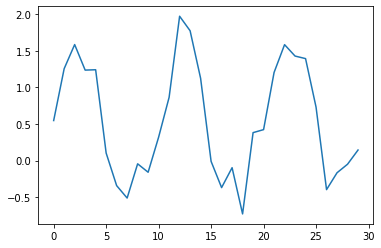

In [29]:
import matplotlib.pyplot as plt
plt.plot(t_s)

## Finding Smallest best Context length to predict 2 forward observations


we have 30 observations 
We can decide that after t=10 or some other number we will start predicting 

Only after ii==10 we will start predicting 

But its better that we prepare the data and then run the model

For data preparation w ehave prediction length as 2 context length is variable and time_series is constant




In [38]:
from keras.models import Sequential
from keras.layers import Dense


def create_model(context_length,prediction_length):
  model = Sequential()
  model.add(Dense(100, activation='relu', input_dim=context_length))
  model.add(Dense(prediction_length))
  model.compile(optimizer='adam', loss='mse')
  return model



In [51]:
c=3
starting_idx=20


def computer_error(temp_context_length,starting_idx=20,temp_prediction_length=2):

  temp_x,temp_y=generate_sequence(t_s,context_length=temp_context_length,prediction_length=temp_prediction_length)
  temp_model=create_model(context_length=temp_context_length,prediction_length=temp_prediction_length)

  lt_err=[]
  for idx in range(starting_idx,len(temp_x)):
    xx_iter=temp_x[:idx]
    yy_iter=np.array(temp_y[:idx])

    temp_model.fit(xx_iter,yy_iter,epochs=5,verbose=False)
    
    y_pred=temp_model.predict(
                  temp_x[idx].reshape(-1,*temp_x[idx].shape)
                            )
    temp_rmse=np.power(
        np.mean(
            np.power((y_pred-temp_y[idx]),2
                    )
                ),(1/2))
    lt_err.append(temp_rmse)
  return lt_err



computer_error(3)

[1.2678809057070868,
 1.0466232455824531,
 0.544363390074025,
 0.5031972628394787,
 0.29997345792413443,
 0.09947506891932352]

In [54]:
from collections import defaultdict
temp_dict=defaultdict(list)


for c in range(1,6):
  temp_lt_err=computer_error(c)
  temp_dict[c]=temp_lt_err
  print(c,end='-->')



1-->2-->3-->4-->5-->

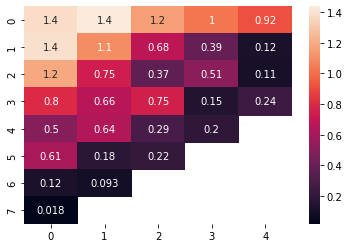

In [67]:
import seaborn as sns 
sns.heatmap(
    pd.concat(map(lambda i : pd.Series(i),temp_dict.values()),axis=1)
    ,annot=True
)

In [66]:
pd.concat(map(lambda i : pd.Series(i),([np.arange(10) for _ in range(5)])),axis=1)

pd.concat(map(lambda i : pd.Series(i),[np.arange(10) for _ in range(5)]),axis=1)

pd.concat(map(lambda i : pd.Series(i),temp_dict.values()),axis=1)

,0,1,2,3,4
0,1.383410,1.438343,1.158507,1.029062,0.919366
1,1.394285,1.100231,0.683256,0.391947,0.121130
2,1.189554,0.748852,0.372766,0.513760,0.110243
3,0.795987,0.658227,0.751589,0.147363,0.244015
4,0.499314,0.643636,0.288180,0.198189,NaN
5,0.614491,0.178347,0.215371,NaN,NaN
6,0.120686,0.093166,NaN,NaN,NaN
7,0.017693,NaN,NaN,NaN,NaN


## ROUGH WORK

In [48]:
xx_iter.shape,np.array(yy_iter).shape
# temp_model.predict(
temp_x[idx].reshape(-1,*temp_x[idx].shape).shape

(1, 3, 1)